In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.cross_validation import cross_val_score
np.random.seed(2)
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn import preprocessing


plt.rcParams['font.family']='SimHei' #顯示中文

%matplotlib inline

sns.set(style='white', context='notebook', palette='deep')

train = pd.read_csv('C:/Users/Eric/Desktop/AIA/train.csv', encoding = "utf-8", dtype = {'type': np.int32})

labels = []
labels += [1 for i in range(40)]
labels += [2 for i in range(40)]
labels += [3 for i in range(40)]
labels += [4 for i in range(3)]

train.shape


C:\Users\Eric\Anaconda3\envs\gg\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


(123, 7)

In [2]:
train.head()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [3]:
train.isnull().sum()

id      0
花萼長度    1
花萼寬度    1
花瓣長度    0
花瓣寬度    0
屬種      0
type    0
dtype: int64

In [4]:
train['花萼長度'] = train['花萼長度'].fillna(train['花萼長度'].mean())
train['花萼寬度'] = train['花萼寬度'].fillna(train['花萼寬度'].mean())
train.isnull().sum()

id      0
花萼長度    0
花萼寬度    0
花瓣長度    0
花瓣寬度    0
屬種      0
type    0
dtype: int64

In [5]:
dataframe = train.drop(['id','屬種','type'],axis=1)
dataframe.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,5.4,3.7,1.5,0.2
1,4.8,3.4,1.6,0.2
2,4.8,3.0,1.4,0.1
3,4.3,3.0,1.1,0.1
4,5.8,4.0,1.2,0.2


C:\Users\Eric\Anaconda3\envs\gg\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


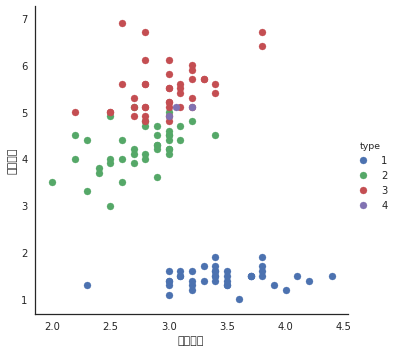

In [6]:
plt.rcParams['font.family']='SimHei' #顯示中文

sns.FacetGrid(train, hue="type", size=5) \
   .map(plt.scatter, "花萼寬度", "花瓣長度") \
   .add_legend()

C:\Users\Eric\Anaconda3\envs\gg\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


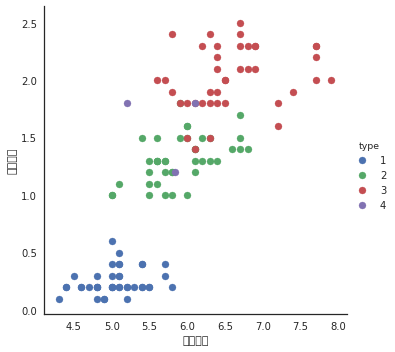

In [7]:
sns.FacetGrid(train, hue="type", size=5) \
   .map(plt.scatter, "花萼長度", "花瓣寬度") \
   .add_legend()

In [8]:

X_train,X_test,Y_train,Y_test = train_test_split(dataframe,labels, random_state = 22, test_size = 0.2)



dataframe.head()


,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,5.4,3.7,1.5,0.2
1,4.8,3.4,1.6,0.2
2,4.8,3.0,1.4,0.1
3,4.3,3.0,1.1,0.1
4,5.8,4.0,1.2,0.2


In [9]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5)

In [10]:
clfModel6 = svm.SVC()
# check the accuracy
# the data is split 5 times
scores = cross_val_score(clfModel6,  X_train, Y_train, cv=5, verbose = 1)
print("Accuracy for SVM: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy for SVM: 0.95 (+/- 0.09)
[0.9047619  0.9047619  1.         0.94736842 1.        ]


C:\Users\Eric\Anaconda3\envs\gg\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [11]:
classifierModel = svm.SVC()
classifierModel.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
import pandas as pd
import numpy as np

test = pd.read_csv('C:/Users/Eric/Desktop/AIA/test.csv', encoding = "utf-8", dtype = {'type': np.int32})

test.head()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [15]:
testdata = test.drop(['id'],axis=1)
testdata.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
predict = classifierModel.predict(testdata)

data = {'id':test['id'], 'type':predict}


resultdata = pd.DataFrame(data=data)

resultdata

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [25]:
resultdata.to_csv('C:/Users/Eric/Desktop/AIA/result.csv', index = False )